In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [33]:
df = pd.read_csv("movies_cleaned.csv")

In [34]:
df.drop(columns=['movie_id'], inplace=True)

# Standardise Columns
for column in df.columns:
    if df[column].dtype == 'float64':
        c = df[column]
        df[column] = (c-c.min())/(c.max()-c.min())

In [35]:
df.head()

,release_date,budget,revenue_worldwide,runtime,cast_popularity_mean,cast_popularity_max,director_popularity,original_language,imdb_rating,imdb_votes,mpaa_rating,domestic_box_office,rotten_tomatoes_score,metacritic_score,season
0,2004-06-11,0.000685,0.015774,95,0.035398,0.027694,0.079028,en,0.720000,0.080836,PG,0.047553,0.72,0.580247,Summer
1,2021-02-06,0.059942,0.023942,117,0.022390,0.014619,0.035171,zh,0.693333,0.001356,TV-14,0.000000,0.80,0.506173,Winter
2,2021-02-12,0.059942,0.028751,115,0.083942,0.063939,0.011529,en,0.626667,0.011970,TV-14,0.000000,0.79,0.592593,Winter
3,2003-05-30,0.160986,0.321625,100,0.037234,0.020001,0.074237,en,0.880000,0.381959,G,0.406596,0.99,0.901235,Spring
4,2000-09-01,0.021408,0.013702,140,0.049804,0.029024,0.135686,en,0.840000,0.039375,R,0.004467,0.69,0.567901,Fall


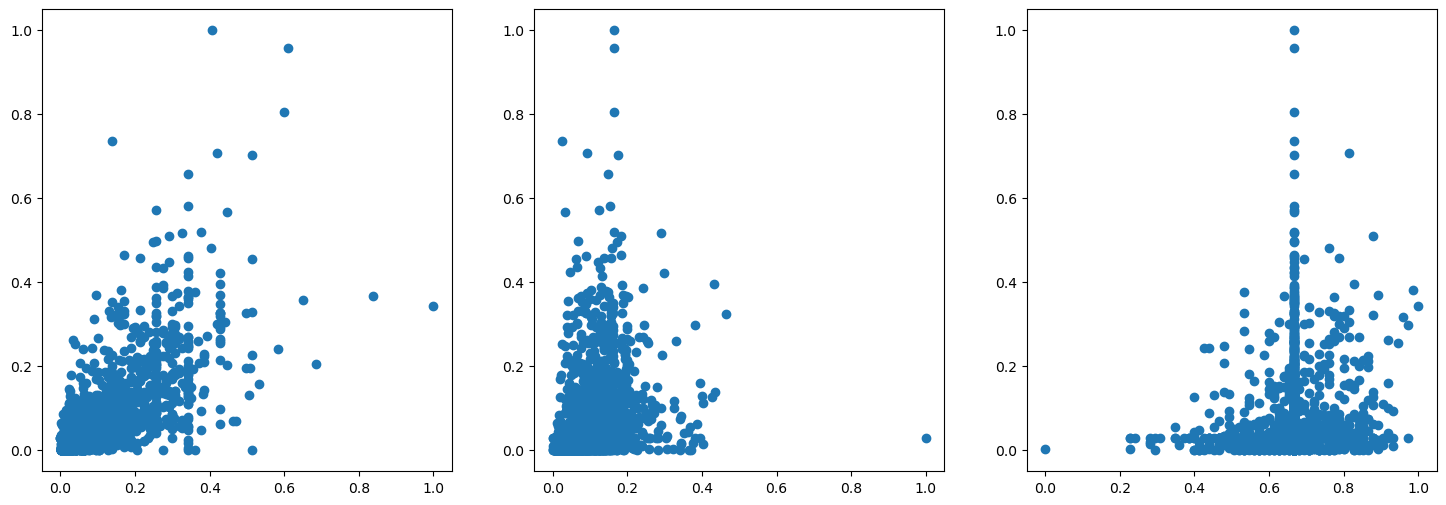

In [36]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(df.budget, df.revenue_worldwide)

plt.subplot(1, 3, 2)
plt.scatter(df.cast_popularity_mean, df.revenue_worldwide)

plt.subplot(1, 3, 3)
plt.scatter(df.imdb_rating, df.revenue_worldwide)

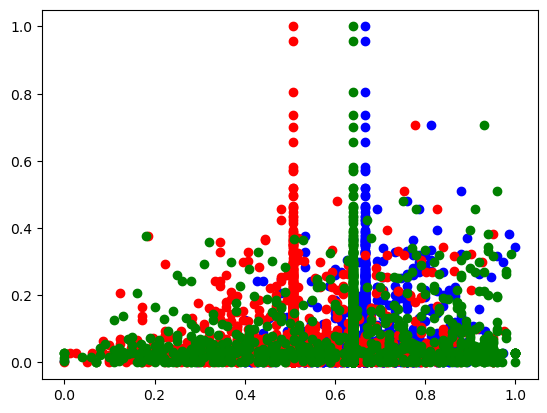

In [37]:
plt.scatter(df.imdb_rating, df.revenue_worldwide, c='blue')
plt.scatter(df.metacritic_score, df.revenue_worldwide, c='red')
plt.scatter(df.rotten_tomatoes_score, df.revenue_worldwide, c='green')

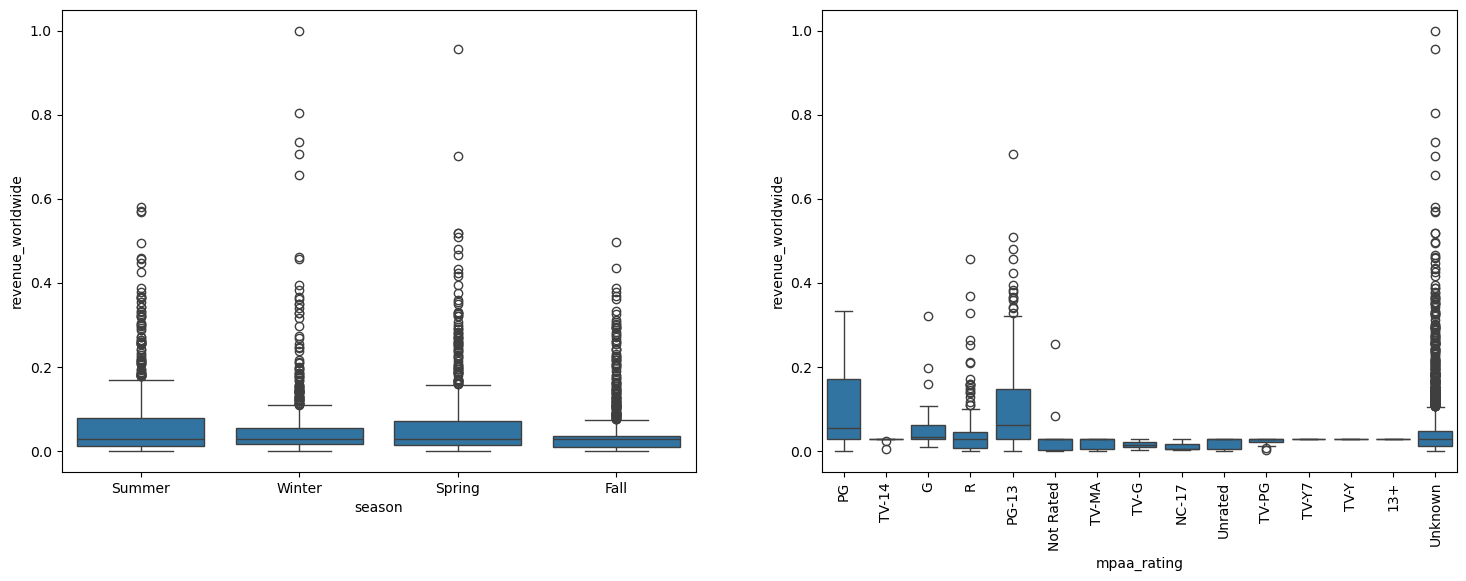

In [47]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
sb.boxplot(data=df, x='season', y='revenue_worldwide')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sb.boxplot(data=df, x='mpaa_rating', y='revenue_worldwide');